In [1]:
import numpy as np
import matplotlib.pyplot as plt
import subprocess

In [2]:
srcSeq = "fibonacci/seqFibonacci.c"
srcBase = "fibonacci/baseFibonacci.c"
srcIter = "fibonacci/iterativeFibonacci.c"
srcMemoi = "fibonacci/memoizationFibonacci.c"
srcThres = "fibonacci/thresholdingFibonacci.c"

exe_seq = "exe_seq.out"
exe_par = "exe_par.out"
exe_iter = "exe_iter.out"
exe_memoi = "exe_memoi.out"
exe_thres = "exe_thres.out"

!gcc -o exe_seq.out -fopenmp fibonacci/seqFibonacci.c
!gcc -o exe_par.out -fopenmp fibonacci/baseFibonacci.c
!gcc -o exe_iter.out -fopenmp fibonacci/iterativeFibonacci.c
!gcc -o exe_memoi.out -fopenmp fibonacci/memoizationFibonacci.c
!gcc -o exe_thres.out -fopenmp fibonacci/thresholdingFibonacci.c

N_values = range(0, 41)   
repeats = 5

results_seq = []
results_par = []
results_iter = []
results_memoi = []
results_thres = []

exec_types = [
    (exe_seq, results_seq),
    (exe_par, results_par),
    (exe_iter, results_iter),
    (exe_memoi, results_memoi),
    (exe_thres, results_thres)
]

for exe, results in exec_types:
    for N in N_values:
        times = []
        for _ in range(repeats):
            result = subprocess.run([f"./{exe}", str(N)], capture_output=True, text=True)
            elapsed_time = float(result.stdout.strip())
            times.append(elapsed_time)
        mean = np.mean(times)
        std = np.std(times)
        results.append((mean, std))

means_par, stds_par = zip(*results_par)
means_seq, stds_seq = zip(*results_seq)
means_iter, stds_iter = zip(*results_iter)
means_memoi, stds_memoi = zip(*results_memoi)
means_thres, stds_thres = zip(*results_thres)

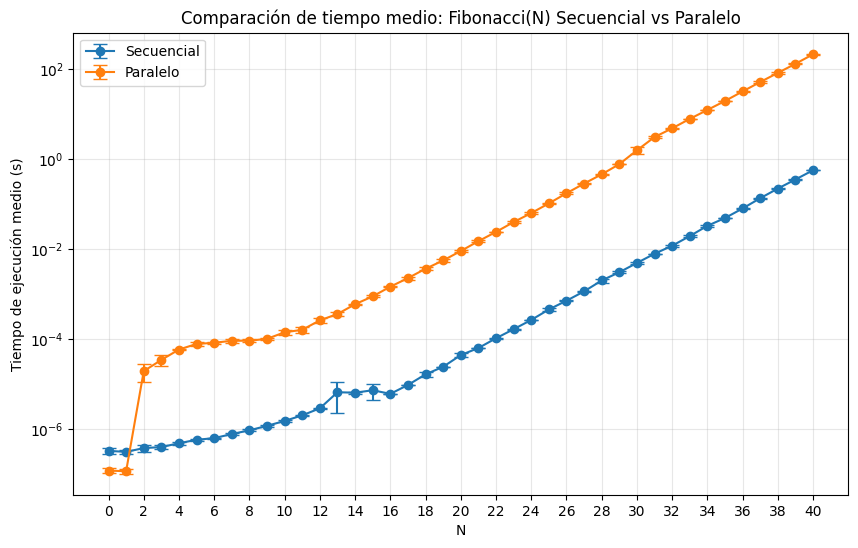

In [11]:
plt.figure(figsize=(10,6))
plt.errorbar(N_values, means_seq, yerr=stds_seq, capsize=5, label="Secuencial", fmt='-o')
plt.errorbar(N_values, means_par, yerr=stds_par, capsize=5, label="Paralelo", fmt='-o')
plt.xticks(range(min(N_values), max(N_values) + 1, 2))
plt.xlabel("N")
plt.ylabel("Tiempo de ejecución medio (s)")
plt.title("Comparación de tiempo medio: Fibonacci(N) Secuencial vs Paralelo")
plt.yscale("log")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

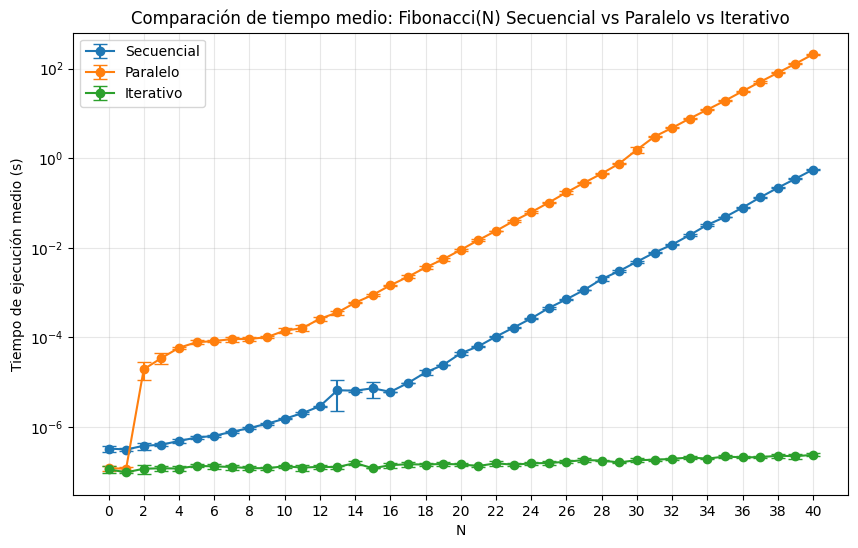

In [12]:
plt.figure(figsize=(10,6))
plt.errorbar(N_values, means_seq, yerr=stds_seq, capsize=5, label="Secuencial", fmt='-o')
plt.errorbar(N_values, means_par, yerr=stds_par, capsize=5, label="Paralelo", fmt='-o')
plt.errorbar(N_values, means_iter, yerr=stds_iter, capsize=5, label="Iterativo", fmt='-o')
plt.xticks(range(min(N_values), max(N_values) + 1, 2))
plt.xlabel("N")
plt.ylabel("Tiempo de ejecución medio (s)")
plt.title("Comparación de tiempo medio: Fibonacci(N) Secuencial vs Paralelo vs Iterativo")
plt.yscale("log")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

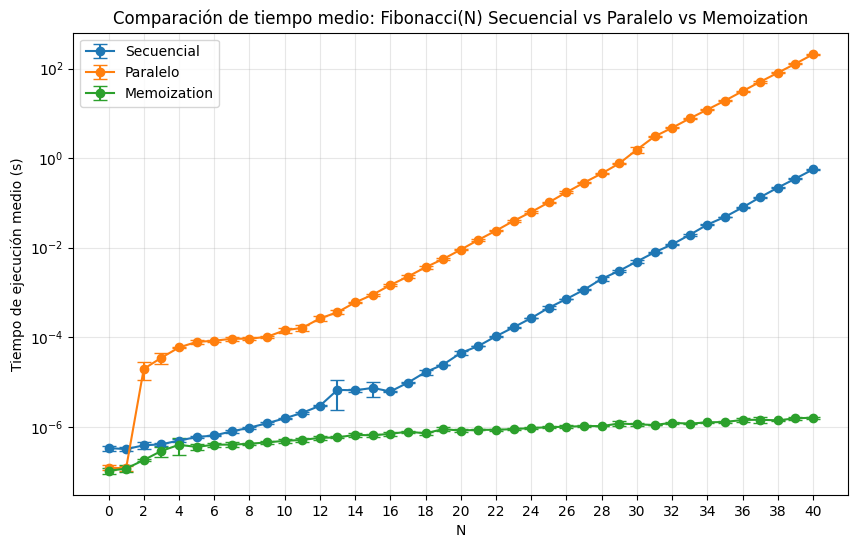

In [13]:
plt.figure(figsize=(10,6))
plt.errorbar(N_values, means_seq, yerr=stds_seq, capsize=5, label="Secuencial", fmt='-o')
plt.errorbar(N_values, means_par, yerr=stds_par, capsize=5, label="Paralelo", fmt='-o')
plt.errorbar(N_values, means_memoi, yerr=stds_memoi, capsize=5, label="Memoization", fmt='-o')
plt.xticks(range(min(N_values), max(N_values) + 1, 2))
plt.xlabel("N")
plt.ylabel("Tiempo de ejecución medio (s)")
plt.title("Comparación de tiempo medio: Fibonacci(N) Secuencial vs Paralelo vs Memoization")
plt.yscale("log")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

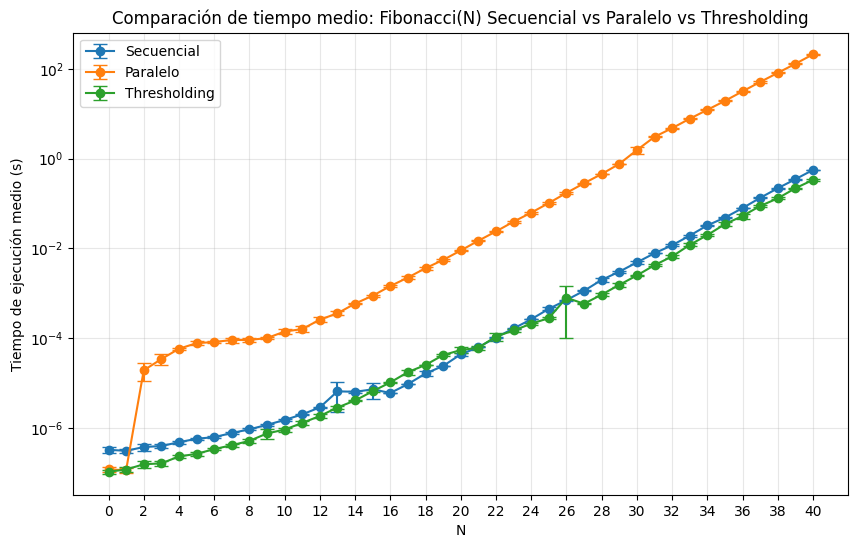

In [14]:
plt.figure(figsize=(10,6))
plt.errorbar(N_values, means_seq, yerr=stds_seq, capsize=5, label="Secuencial", fmt='-o')
plt.errorbar(N_values, means_par, yerr=stds_par, capsize=5, label="Paralelo", fmt='-o')
plt.errorbar(N_values, means_thres, yerr=stds_thres, capsize=5, label="Thresholding", fmt='-o')
plt.xticks(range(min(N_values), max(N_values) + 1, 2))
plt.xlabel("N")
plt.ylabel("Tiempo de ejecución medio (s)")
plt.title("Comparación de tiempo medio: Fibonacci(N) Secuencial vs Paralelo vs Thresholding")
plt.yscale("log")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

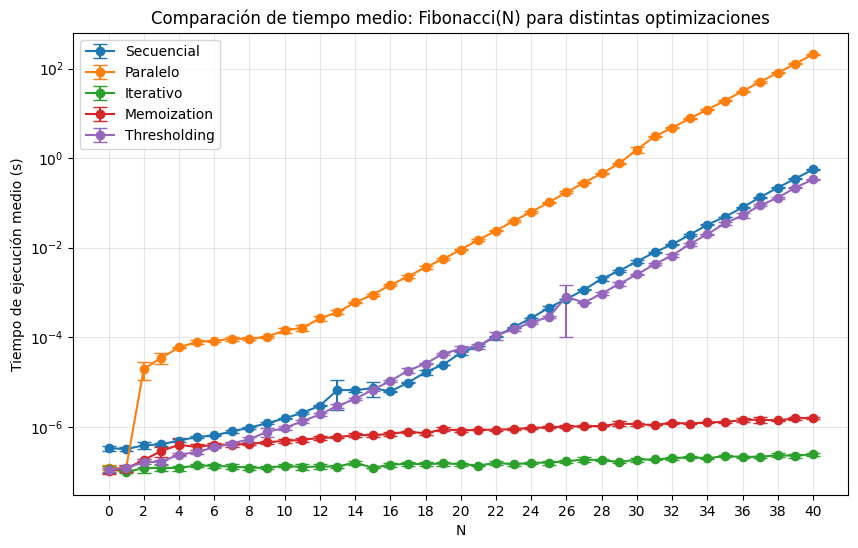

In [15]:
plt.figure(figsize=(10,6))
plt.errorbar(N_values, means_seq, yerr=stds_seq, capsize=5, label="Secuencial", fmt='-o')
plt.errorbar(N_values, means_par, yerr=stds_par, capsize=5, label="Paralelo", fmt='-o')
plt.errorbar(N_values, means_iter, yerr=stds_iter, capsize=5, label="Iterativo", fmt='-o')
plt.errorbar(N_values, means_memoi, yerr=stds_memoi, capsize=5, label="Memoization", fmt='-o')
plt.errorbar(N_values, means_thres, yerr=stds_thres, capsize=5, label="Thresholding", fmt='-o')
plt.xticks(range(min(N_values), max(N_values) + 1, 2))
plt.xlabel("N")
plt.ylabel("Tiempo de ejecución medio (s)")
plt.title("Comparación de tiempo medio: Fibonacci(N) para distintas optimizaciones")
plt.yscale("log")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()